# Introduction

This work is borrowed from my materials science course for data science. These were the beginning steps to tackling machine learning problems with large data sets. 

You don't inherently need to know chemistry or materials science to do this. This isn't even a college level problem. 

This is a graduate school problem. So if it is hard that is OK. That is the point. 

I'd recommend using github vs. colab on this. 

I haven't decided yet but I might supply some answers once once you have tried it out.

**This work will explore the following:**

*   Large public databases with API (Materials Project)
*   Shared research data (figshare)





In [9]:
import matplotlib.pyplot as plt
import math 
import numpy as np
import pandas as pd
import matplotlib as mpl

In [10]:
import ruamel_yaml as yaml
from pymatgen.ext.matproj import MPRester
from pprint import pprint

m = MPRester("rTugpfQodw48iDx0")

/Users/sujian/opt/anaconda3/lib/python3.9/site-packages/pymatgen/ext/matproj.py:179: UserWarning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.
  warnings.warn(


In [11]:
data = m.query(criteria="**O3",properties=["task_id", "pretty_formula", "band_gap", "unit_cell_formula", "formation_energy_per_atom", "icsd_ids", "energy_above_hull"])
pprint(data)

/Users/sujian/opt/anaconda3/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:210: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/Users/sujian/opt/anaconda3/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:210: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/Users/sujian/opt/anaconda3/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:210: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/Users/sujian/opt/anaconda3/lib/python3.9/site-packages/pymatgen/core/periodic_table.py:210: UserWarning: No electronegativity for Rf. Setting to NaN. This has no physical meaning, and is

[{'band_gap': 0.0,
  'energy_above_hull': None,
  'formation_energy_per_atom': -2.28230765175,
  'icsd_ids': [],
  'pretty_formula': 'CaFeO3',
  'task_id': 'mp-1001571',
  'unit_cell_formula': {'Ca': 1.0, 'Fe': 1.0, 'O': 3.0}},
 {'band_gap': 1.0186000000000002,
  'energy_above_hull': None,
  'formation_energy_per_atom': -2.8522908337499993,
  'icsd_ids': [],
  'pretty_formula': 'BaSiO3',
  'task_id': 'mp-1016821',
  'unit_cell_formula': {'Ba': 1.0, 'O': 3.0, 'Si': 1.0}},
 {'band_gap': 0.0,
  'energy_above_hull': None,
  'formation_energy_per_atom': -2.4739191907499984,
  'icsd_ids': [],
  'pretty_formula': 'BaGeO3',
  'task_id': 'mp-1016823',
  'unit_cell_formula': {'Ba': 1.0, 'Ge': 1.0, 'O': 3.0}},
 {'band_gap': 0.0,
  'energy_above_hull': None,
  'formation_energy_per_atom': -0.85173720875,
  'icsd_ids': [],
  'pretty_formula': 'CdIrO3',
  'task_id': 'mp-1016828',
  'unit_cell_formula': {'Cd': 1.0, 'Ir': 1.0, 'O': 3.0}},
 {'band_gap': 0.0,
  'energy_above_hull': None,
  'formation_en

# Q1 - Materials Project data
Using pymatgen (or any alternative approach), query the Materials Project for the following properties of all ABO3 type compounds (hint: look at this example notebook and figure out what is the best way to do this): 

* materials project identifier (this is called task_id)
* formula of the compound
* number of sites in the unit cell
* band gap
* formation energy per atom
* icsd ids (note that icsd_id key is no longer used, use icsd_ids instead)
* energy above hull



You will need to sign up for a free account at https://www.materialsproject.org and get an API_KEY from the https://www.materialsproject.org/dashboard.

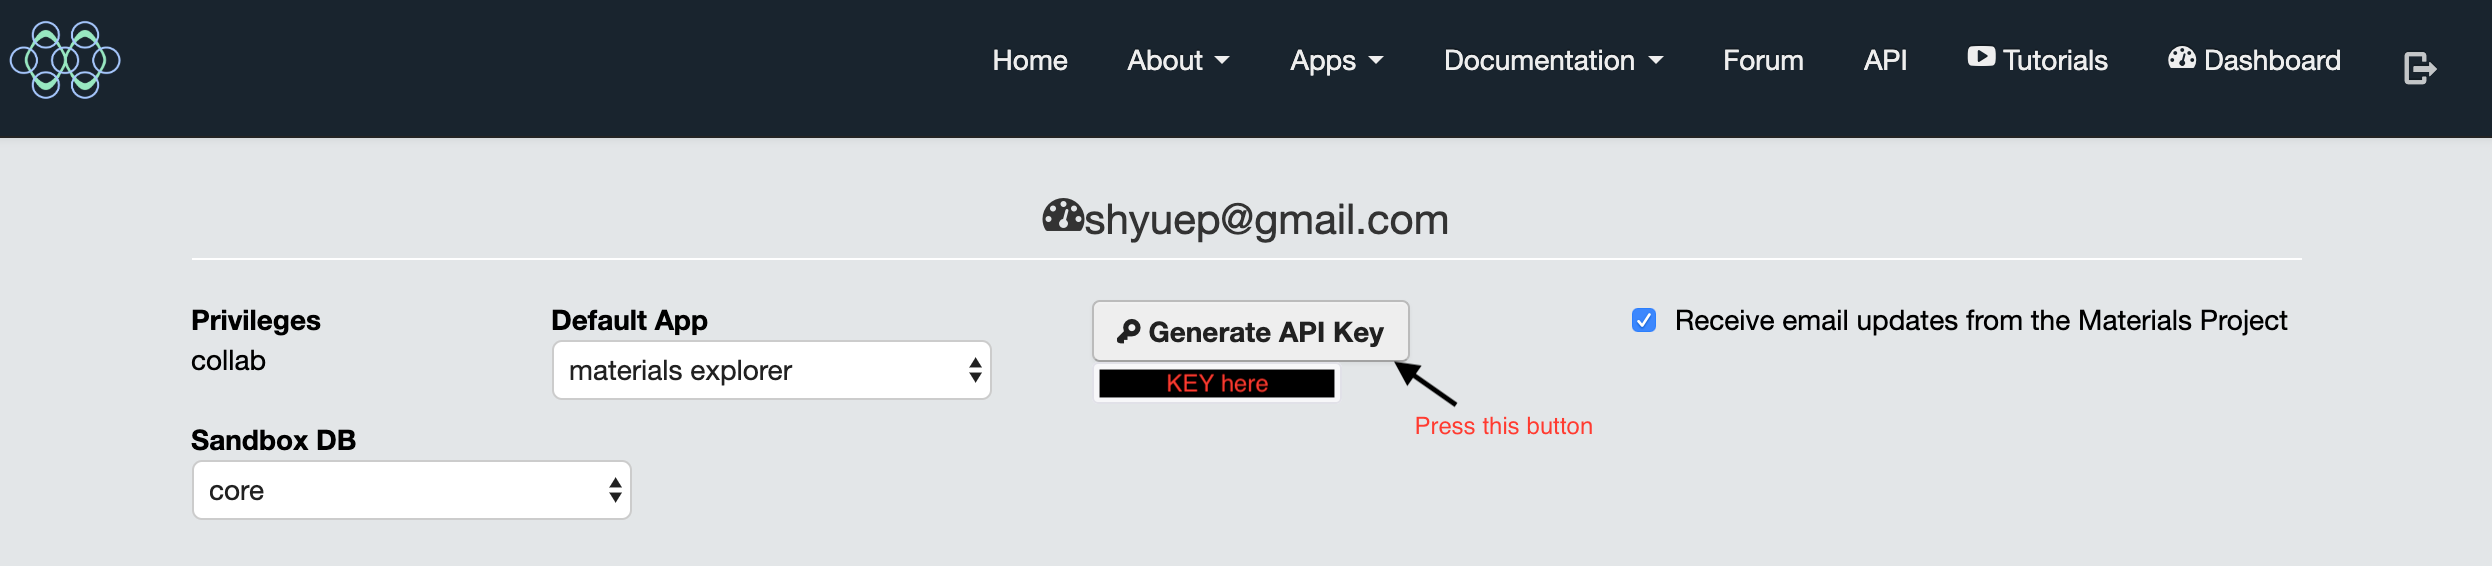

Please complete the following Question 1:

1. Perform the query and convert the data into a Pandas DataFrame.

2. How many ABO3 compounds in total are there in the Materials Project? How many unique ABO3 formulae are there? What is the average number of crystals (also known as polymorphs) per ABO3 formula?

3. Typically, the existence of an ICSD (Inorganic Crystal Structure Database) id is a rough indication of whether a compound is an experimentally-known compound or a theoretical compound. What fraction of the compounds have at least one icsd id?

4. The formation energies in the Materials Project are given in eV/atom. Create an additional column in your dataset that has the formation energies in J/mol.

5. Let us assume that materials with energy above hull of >0.03 eV/atom are unstable and are potentially stable otherwise. Furthermore, band gaps of 0, (0, 1], [1, +inf) are indicative of metallic, small band gap, large band gap for the materials. Create a table of the number of ABO3 crystals in each joint category, e.g., (unstable, metallic), (unstable, small band gap), etc.

6. Plot the distribution of (a) the formation energies per atom (in eV/atom) and (b) the band gaps of all the materials. Annotate the plots with the average and standard deviation of each quantity. Ensure that all axes are labelled appropriately with units, i.e., something that you can potentially put in a scientific paper.

In [12]:
# 1.1
df = pd.DataFrame(data)
display(df)

,task_id,pretty_formula,band_gap,unit_cell_formula,formation_energy_per_atom,icsd_ids,energy_above_hull
0,mp-1001571,CaFeO3,0.0000,"{'Ca': 1.0, 'Fe': 1.0, 'O': 3.0}",-2.282308,[],None
1,mp-1016821,BaSiO3,1.0186,"{'Ba': 1.0, 'Si': 1.0, 'O': 3.0}",-2.852291,[],None
2,mp-1016823,BaGeO3,0.0000,"{'Ba': 1.0, 'Ge': 1.0, 'O': 3.0}",-2.473919,[],None
3,mp-1016828,CdIrO3,0.0000,"{'Cd': 1.0, 'Ir': 1.0, 'O': 3.0}",-0.851737,[],None
4,mp-1016833,CaRhO3,0.0000,"{'Ca': 1.0, 'Rh': 1.0, 'O': 3.0}",-1.851243,[],None
...,...,...,...,...,...,...,...
2393,mvc-4001,ZnCrO3,0.0280,"{'Zn': 4.0, 'Cr': 4.0, 'O': 12.0}",-1.851246,[],None
2394,mvc-4002,ZnMoO3,0.8663,"{'Zn': 4.0, 'Mo': 4.0, 'O': 12.0}",-1.780286,[],None
2395,mvc-4008,ZnNiO3,0.0000,"{'Zn': 4.0, 'Ni': 4.0, 'O': 12.0}",-0.965703,[],None
2396,mvc-4013,ZnWO3,1.7419,"{'Zn': 4.0, 'W': 4.0, 'O': 12.0}",-1.768571,[],None


In [13]:
# 1.2
total_value = df['pretty_formula'].value_counts()
display(total_value)
unique = list(df['pretty_formula'].unique())
display(unique)
len(unique)
polymorphs = total_value.mean()
print(polymorphs)

MgSiO3    33
LaMnO3    17
NaNbO3    17
CaCO3     14
CaSiO3    14
          ..
LaRuO3     1
MnCoO3     1
LaLuO3     1
LaYbO3     1
MgBeO3     1
Name: pretty_formula, Length: 1311, dtype: int64

['CaFeO3',
 'BaSiO3',
 'BaGeO3',
 'CdIrO3',
 'CaRhO3',
 'CaRuO3',
 'CdRuO3',
 'BaRhO3',
 'BaMnO3',
 'CaVO3',
 'CaIrO3',
 'CaHfO3',
 'CdRhO3',
 'CdSiO3',
 'CdSnO3',
 'CdOsO3',
 'CaGeO3',
 'CaOsO3',
 'CdGeO3',
 'BaVO3',
 'CaMnO3',
 'BaRuO3',
 'BaZrO3',
 'CeGaO3',
 'BaCoO3',
 'BaCuO3',
 'BaTiO3',
 'CeAsO3',
 'CaCO3',
 'BaClO3',
 'CaBO3',
 'CaCuO3',
 'CaCoO3',
 'BaNiO3',
 'BiCO3',
 'CaBiO3',
 'BaPdO3',
 'BaSnO3',
 'AlRhO3',
 'AlVO3',
 'AlInO3',
 'AgPbO3',
 'AgClO3',
 'AgBrO3',
 'AgAsO3',
 'AgGeO3',
 'AlPdO3',
 'AlCoO3',
 'AlFeO3',
 'AlCuO3',
 'CaSiO3',
 'AcBO3',
 'AcGaO3',
 'AcAlO3',
 'AlSiO3',
 'AlIrO3',
 'AlSbO3',
 'AcNiO3',
 'AcMgO3',
 'AcPdO3',
 'AcSiO3',
 'AcScO3',
 'AlPbO3',
 'AlAuO3',
 'AcVO3',
 'AlAgO3',
 'AlNiO3',
 'BTeO3',
 'BSbO3',
 'BAuO3',
 'BIrO3',
 'BPdO3',
 'BPtO3',
 'BaBeO3',
 'BaAlO3',
 'BaLiO3',
 'BaCaO3',
 'BaDyO3',
 'BaAuO3',
 'BaInO3',
 'BaScO3',
 'BaPtO3',
 'BaErO3',
 'BaCdO3',
 'BaReO3',
 'BaEuO3',
 'BaTlO3',
 'BaTmO3',
 'BaWO3',
 'CoBO3',
 'BeBiO3',
 'BaZnO3',
 'Ba

1.8291380625476736


In [17]:
# 1.3
display(df[df['icsd_ids'].map(lambda d: len(d))>0])
fraction = 901/2509
display(fraction)

,task_id,pretty_formula,band_gap,unit_cell_formula,formation_energy_per_atom,icsd_ids,energy_above_hull
19,mp-1017465,BaVO3,0.0000,"{'Ba': 1.0, 'V': 1.0, 'O': 3.0}",-2.796361,[191203],None
20,mp-1017467,CaMnO3,0.0000,"{'Ca': 1.0, 'Mn': 1.0, 'O': 3.0}",-2.430397,"[168902, 168903, 181782, 168905]",None
22,mp-1019544,BaZrO3,3.1177,"{'Ba': 2.0, 'Zr': 2.0, 'O': 6.0}",-3.648159,[190881],None
23,mp-1019598,CeGaO3,0.0000,"{'Ce': 4.0, 'Ga': 4.0, 'O': 12.0}",-2.999900,[183679],None
26,mp-1076932,BaTiO3,0.0000,"{'Ba': 1.0, 'Ti': 1.0, 'O': 3.0}",-2.522488,[161419],None
...,...,...,...,...,...,...,...
2313,mp-777295,TmCrO3,2.6770,"{'Tm': 4.0, 'Cr': 4.0, 'O': 12.0}",-3.062091,"[251104, 247738, 251103]",None
2316,mp-7964,YAlO3,3.5561,"{'Y': 2.0, 'Al': 2.0, 'O': 6.0}",-3.646629,[27100],None
2317,mp-8285,ZnGeO3,2.3118,"{'Zn': 2.0, 'Ge': 2.0, 'O': 6.0}",-1.976729,[33722],None
2322,mp-9716,TiBO3,0.0000,"{'Ti': 2.0, 'B': 2.0, 'O': 6.0}",-3.009723,[402039],None


0.3591072140294938

In [19]:
df['form_energy_peratom_evperatom'] = df['formation_energy_per_atom'] * (1.0364 * (10 ** -5))
display(df)

,task_id,pretty_formula,band_gap,unit_cell_formula,formation_energy_per_atom,icsd_ids,energy_above_hull,form_energy_peratom_evperatom
0,mp-1001571,CaFeO3,0.0000,"{'Ca': 1.0, 'Fe': 1.0, 'O': 3.0}",-2.282308,[],None,-0.000024
1,mp-1016821,BaSiO3,1.0186,"{'Ba': 1.0, 'Si': 1.0, 'O': 3.0}",-2.852291,[],None,-0.000030
2,mp-1016823,BaGeO3,0.0000,"{'Ba': 1.0, 'Ge': 1.0, 'O': 3.0}",-2.473919,[],None,-0.000026
3,mp-1016828,CdIrO3,0.0000,"{'Cd': 1.0, 'Ir': 1.0, 'O': 3.0}",-0.851737,[],None,-0.000009
4,mp-1016833,CaRhO3,0.0000,"{'Ca': 1.0, 'Rh': 1.0, 'O': 3.0}",-1.851243,[],None,-0.000019
...,...,...,...,...,...,...,...,...
2393,mvc-4001,ZnCrO3,0.0280,"{'Zn': 4.0, 'Cr': 4.0, 'O': 12.0}",-1.851246,[],None,-0.000019
2394,mvc-4002,ZnMoO3,0.8663,"{'Zn': 4.0, 'Mo': 4.0, 'O': 12.0}",-1.780286,[],None,-0.000018
2395,mvc-4008,ZnNiO3,0.0000,"{'Zn': 4.0, 'Ni': 4.0, 'O': 12.0}",-0.965703,[],None,-0.000010
2396,mvc-4013,ZnWO3,1.7419,"{'Zn': 4.0, 'W': 4.0, 'O': 12.0}",-1.768571,[],None,-0.000018


In [20]:
df.describe()

,band_gap,formation_energy_per_atom,form_energy_peratom_evperatom
count,2398.000000,2398.000000,2398.000000
mean,1.230595,-2.265419,-0.000023
std,1.598627,0.869457,0.000009
min,0.000000,-4.037959,-0.000042
25%,0.000000,-2.885303,-0.000030
50%,0.097650,-2.336232,-0.000024
75%,2.403725,-1.645397,-0.000017
max,5.906300,1.978078,0.000021


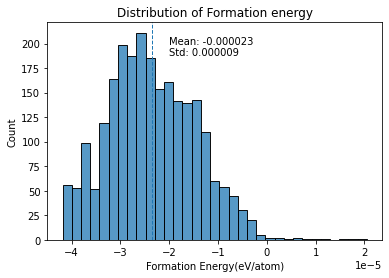

In [31]:
import seaborn as sns

sns.histplot(df['form_energy_peratom_evperatom'])
plt.ylabel('Count')
plt.xlabel('Formation Energy(eV/atom)')
plt.title('Distribution of Formation energy')
plt.axvline(df['form_energy_peratom_evperatom'].mean(), linestyle = 'dashed', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
min_xlim, max_xlim = plt.xlim()
plt.text(df['form_energy_peratom_evperatom'].mean()*0.85, max_ylim*0.9, 'Mean: -0.000023')
plt.text(df['form_energy_peratom_evperatom'].mean()*0.85, max_ylim*0.85, 'Std: 0.000009')
plt.show()

# Q2 - Publicly available research data

Researchers frequently share the datasets they have via various online platforms. Figshare is one such online platform. We will use this example to illustrate some of the challenges in working with datasets.

1. Query for the data from https://ndownloader.figshare.com/files/9158587, which is in the csv format. This is a dataset of from high-throughput DFT calculations of formation energy, stability and oxygen vacancy formation energy of ABO3 perovskites (https://www.nature.com/articles/sdata2017153) available in the Open Quantum Materials Database (OQMD). This dataset, which we will call the OQMD dataset, comprises computed data on compounds known as perovskites. Parse the data into a Pandas DataFrame.

2. How many compounds in total are there?
3. How many total columns are there in the dataset? Print the column names.
4. Unfortunately, the dataset contains invalid data and some of the data are also not properly tagged in the right data type. For example, the formation energy column contains strings, rather than floating point numbers. There are also strings that indicate whether a particular data point is valid. Filter the DataFrame to remove all invalid data points, i.e., those that contain just "-" in the formation energy column. and convert the formation energy column to the proper floats. How many data points remain?

5. Plot the distribution of the formation energies per atom. Annotate the plot with the average and standard deviation.


In [34]:
# 2.1
data2 = pd.read_csv('file:///Users/sujian/Downloads/data2.csv')
display(data2)

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


In [35]:
# 2.2
len(data2)

5329

In [36]:
# 2.3
# 21 columns
print(data2.columns)

Index(['Chemical formula', 'A', 'B', 'In literature', 'Valence A', 'Valence B',
       'Radius A [ang]', 'Radius B [ang]', 'Lowest distortion',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'a [ang]', 'b [ang]', 'c [ang]', 'alpha [deg]', 'beta [deg]',
       'gamma [deg]', 'Vacancy energy [eV/O atom]'],
      dtype='object')


In [42]:
# 2.4
data2.replace({'-' : np.NaN}, inplace = True)
data2 = data2.dropna(subset = ['Formation energy [eV/atom]'])
data2 = data2.astype({'Formation energy [eV/atom]': float})
display(data2)

for i in data2['Formation energy [eV/atom]'].tail():
    print(type(i))

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [43]:
data2.describe()

,Radius A [ang],Radius B [ang],Formation energy [eV/atom]
count,5276.000000,5276.000000,5276.000000
mean,0.975038,0.815318,-1.681050
std,0.337024,0.243545,0.981348
min,0.270000,0.270000,-3.844000
25%,0.690000,0.630000,-2.407250
50%,0.930000,0.770000,-1.751500
75%,1.180000,0.950000,-1.007500
max,1.880000,1.670000,1.879000


Text(-1.4288926933282795, 306.1275, 'Std: 0.9813')

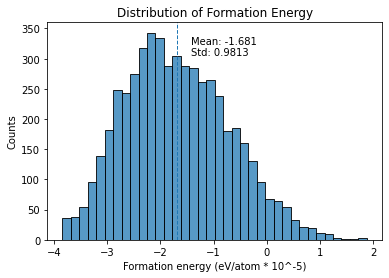

In [44]:
# 2.5
import seaborn as sns
sns.histplot(data2['Formation energy [eV/atom]'])
plt.ylabel('Counts')
plt.xlabel('Formation energy (eV/atom * 10^-5)')
plt.title('Distribution of Formation Energy')
plt.axvline(data2['Formation energy [eV/atom]'].mean(), linestyle = 'dashed', linewidth = 1)
min_ylim, max_ylim = plt.ylim()
min_xlim, max_xlim = plt.xlim()
plt.text(data2['Formation energy [eV/atom]'].mean()*0.85, max_ylim*0.9, 'Mean: -1.681')
plt.text(data2['Formation energy [eV/atom]'].mean()*0.85, max_ylim*0.85, 'Std: 0.9813')

# 3.1
set1 = set(list(data['pretty_formula'].unique()))
set2 = set(list(data2['Chemical formula'].unique()))
set_both = set1.intersecyion(set2)

print(set_both)# Q3 - Comparing data sets
It is often useful to compare similar datasets to check them against each other. The simplest form of the perovskite crystal structure has formula ABO3, and such compounds are present in both the dataset you queried from the Materials Project in Q1 and the OQMD data you downloaded from figshare in Q2.

1. Identify the subset of formulas that are present in both the Materials Project dataset and OQMD dataset (hint: look at the Python built-in set object). How many formulas are there?
2. Plot the distribution of the formation energies per atom of this subset of formulas for (a) the Materials Project dataset, and (b) the OQMD data, overlaying the two distributions on top of each other. Annotate your plot with the mean and standard deviation for each data set.
3. Perform a hypothesis test at the 95% level to determine if there is a significant difference between the formation energies reported in the Materials Project and the OQMD dataset (hint: check out the scipy.stats.ttest_ind method). Discuss your findings, including providing any possible explanations for any discrepancy between the two datasets.

In [47]:
# 3.1
set1 = set(list(df['pretty_formula'].unique()))
set2 = set(list(data2['Chemical formula'].unique()))
set_both = set1.intersection(set2)

print(set_both)

{'PuSbO3', 'MgCuO3', 'SmTlO3', 'SmHoO3', 'TcPbO3', 'CaLaO3', 'KRbO3', 'VHgO3', 'NaPbO3', 'BaZrO3', 'YWO3', 'BaThO3', 'LaGaO3', 'MnTlO3', 'YSiO3', 'MnGeO3', 'GdBO3', 'MnPbO3', 'DyInO3', 'CaCoO3', 'HoAlO3', 'MoPbO3', 'SnPbO3', 'ZnTeO3', 'RbNaO3', 'CsTlO3', 'RbAlO3', 'MgUO3', 'NbBiO3', 'RbTaO3', 'SrYbO3', 'EuMgO3', 'SmBO3', 'EuRuO3', 'CeRhO3', 'CeCrO3', 'SrZnO3', 'InSiO3', 'PmInO3', 'EuVO3', 'BeBiO3', 'NaSrO3', 'HoErO3', 'KNbO3', 'ScAgO3', 'LuScO3', 'RbVO3', 'SrScO3', 'BaScO3', 'CsThO3', 'EuOsO3', 'PmRuO3', 'PuPbO3', 'PrBO3', 'BeCdO3', 'CsGdO3', 'ErGaO3', 'TiCdO3', 'SmLuO3', 'SmSbO3', 'NiMoO3', 'FePbO3', 'PrFeO3', 'ZnMoO3', 'NdSbO3', 'CsNaO3', 'LiCdO3', 'SrOsO3', 'EuAlO3', 'KIrO3', 'ErFeO3', 'RbWO3', 'TlHgO3', 'NpTiO3', 'TiCuO3', 'GdGaO3', 'BeGeO3', 'YTmO3', 'PrTiO3', 'MgZrO3', 'BIrO3', 'GdFeO3', 'MnNiO3', 'AgBiO3', 'CeScO3', 'BiBO3', 'AlVO3', 'DySnO3', 'BaVO3', 'EuUO3', 'SrPrO3', 'ScAlO3', 'ReSbO3', 'EuScO3', 'RbGdO3', 'LaBO3', 'LiLuO3', 'RbPtO3', 'RbCaO3', 'InGaO3', 'MgCrO3', 'InPtO3', 

# Q4 - Exploratory data analysis (10 points)

Load the data.csv in variable orig_data using pandas.read_csv with na_filter=False option, and perform the following analysis. You will be given this

1. How many elements are there in this data set?
2. What is the maximum number of elements (max_el) in a single structure?
3. Plot a barplot of the number of materials having 1, 2, 3, ... max_els. Use a log scale for the y-axis.
4. Count the number of materials where each element is present. Sort this count and answer the following questions. What are the 10 most common elements in this data set? and what are the 10 least common elements in this data set?


Hint: When dealing with formula, you may use pymatgen.core.Composition to speed up the process. For example, the following code snippet shows the use of Composition to process formula. For more usage, you may visit https://matgenb.materialsvirtuallab.org/2013/01/01/Basic-functionality.html

In [32]:
from pymatgen.core import Composition
comp = Composition('Al2O3')
print(comp.elements)  # this will give you the elements
print(comp.to_data_dict['unit_cell_composition'])  # this will give you the elementstr-stoichiometry dictionary.

[Element Al, Element O]
defaultdict(<class 'float'>, {'Al': 2.0, 'O': 3.0})
